In [245]:
# LOAD EXTRACTION RESULT


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# IMPORT SECTION ___________________________________________________________

# LOAD DATASETS IDS FROM CSV FILE
IDs_df = pd.read_csv("Data/Dataset_Info.csv",";")
IDs_df




PLAYLIST                      ID   DESCRIPTION  CATEGORY
0          0  2JyC6Os4Tjc4V6LwXhJKst  NOT FANCIED          0
1          1  2ZTUES6KnGqczd4RgAKuBf           NaN         1
2          2  2fvfIU3x4mvnx14hEt0VTx           NaN         1
3          3  6TuZ84F0r7VUfRTkHEc1x0           NaN         2
4          4  78mEtY1fJsU81a1w8Ytxqa           NaN         1
5          5  61RvEJit9j8DMCcJTgrpo9           NaN         3
6          6  1Enng1Br4k2DXSKdSnF7jF           NaN         1
7          7  5kktKb52Hkh1jPFmWtAFEF           NaN         3
8          8  5DIZHlJmzmPM5PMXfIMAoT           NaN         3
9          9  1khlc5IqNuZbsqiTWG1R17           NaN         1
10        10  4npSSPvGxLiEzRwaQzBPbq           NaN         2
11        11  6N0UMaA4JVruyroxHmYJRV           NaN         2
12        12  4JsvGXyre6ki4vYjYDDQHU           NaN         2
13        13  6mns8BAZ23YRFgz1orrkGf           NaN         2
14        14  45FjUZsAt80AJPQGsALf7G           NaN         2
15        15  3n9oSQEMiEv158HQ1h8U4P           NaN         2
16        16  6lWR3GAMtM4s1LMPsFcJqb           NaN         2
17        17  3iLnvUEiarEG7XnkMGUgHG           NaN         2
18        18  6MYe7Agn7DjbB9dPTUT71L           NaN         1
19        19  1yu9gAgsXlulGqXtfnLSKQ           NaN         2
20        20  0vsOA3UbiA5Tf6KQJYrsJb           NaN         2

In [246]:

# LOAD DATASETS INFO
INFO = pd.read_csv("Data/Dataset_Info.csv",";")
COLLECTION = {}
for index, row in INFO.iterrows():
    play = row['PLAYLIST']
    playDf = pd.read_csv("Data/Datasets/Dataset" + str(play) + ".csv")    
    COLLECTION[index] = playDf
    


In [247]:
# MAKE SIMPLE 0/1 PREFERENCE UNIONS

likedSongsUNION = COLLECTION[1]

for key in COLLECTION.keys():
    if key > 0:
        print(COLLECTION[key].shape[0])
        likedSongsUNION = likedSongsUNION.append(COLLECTION[key])



151
136
50
283
496
244
143
328
565
634
301
152
0
97
0
943
114
396
0
0


In [248]:

G  = pd.DataFrame()

for play in range(20):
    if play == 0:
        NG = pd.read_csv("Data/Datasets\Dataset0.csv",",")
    else:
        playDf = pd.read_csv("Data/Datasets/Dataset" + str(play) + ".csv") 
    G=pd.concat([G,playDf])

    

G

Unnamed: 0                                               name  \
0            0                                        Va pensiero   
1            1  Zadok the Priest (Coronation Anthem No. 1, HWV...   
2            2                  Turandot / Act 3: "Nessun dorma!"   
3            3       La Traviata / Act 1: Libiamo ne'lieti calici   
4            4             Rigoletto / Act 3: "La donna è mobile"   
..         ...                                                ...   
391        391                                           Fidelity   
392        392                                        Ragged Wood   
393        393                                           Float On   
394        394                            Something Good Can Work   
395        395                                        Coffee & TV   

                                                 album             artist  \
0           Je n'aime pas Verdi, mais ça j'aime bien !     Giuseppe Verdi   
1    Carmina Burana - The Greatest Classical Choir ...    Various Artists   
2                       Puccini: Turandot - Highlights    Giacomo Puccini   
3                                   Verdi: La Traviata     Giuseppe Verdi   
4                                    Pavarotti Forever  Luciano Pavarotti   
..                                                 ...                ...   
391                                      Begin to Hope     Regina Spektor   
392                                        Fleet Foxes        Fleet Foxes   
393             Good News For People Who Love Bad News       Modest Mouse   
394                       Kitsuné Maison Compilation 7    Various Artists   
395                                                 13               Blur   

    release_date  length popularity  danceability  acousticness  \
0     2019-05-17  290613         35         0.240        0.9760   
1     2014-10-17  318000          0         0.291        0.8770   
2     1973-01-01  177333         63         0.212        0.9630   
3     1977-01-01  175506         56         0.424        0.9620   
4     1997-01-01  142173         59         0.369        0.9590   
..           ...     ...        ...           ...           ...   
391   2006-06-13  226680         61         0.923        0.5200   
392   2008-06-09  307213         48         0.362        0.0995   
393   2004-04-05  208466         71         0.649        0.0130   
394   2009-06-01  165320          0         0.676        0.0208   
395         1999  358773         66         0.743        0.0511   

     danceability.1  energy  instrumentalness  liveness  loudness  \
0             0.240  0.1570          0.924000    0.1080   -17.034   
1             0.291  0.0939          0.779000    0.0799   -21.057   
2             0.212  0.3010          0.003300    0.1300   -12.505   
3             0.424  0.2140          0.000029    0.6810   -17.688   
4             0.369  0.2100          0.000045    0.0905   -13.552   
..              ...     ...               ...       ...       ...   
391           0.923  0.5180          0.000142    0.1040    -6.008   
392           0.362  0.6580          0.010200    0.0602    -5.929   
393           0.649  0.8880          0.000002    0.0888    -4.807   
394           0.676  0.9220          0.002130    0.1160    -4.499   
395           0.743  0.7430          0.233000    0.0987   -10.117   

     speechiness    tempo time_signature  
0         0.0382   68.828              4  
1         0.0342  102.084              4  
2         0.0384   84.025              4  
3         0.0763  113.211              4  
4         0.0437  131.714              3  
..           ...      ...            ...  
391       0.0492   93.023              4  
392       0.0292  104.210              4  
393       0.0293  100.975              4  
394       0.0576  119.929              4  
395       0.0367  121.604              4  

[5033 rows x 17 columns]

In [249]:
NG.shape


(3012, 17)

In [250]:
G.shape

(5033, 17)

In [251]:
type(NG)

pandas.core.frame.DataFrame

In [252]:
type(G)

pandas.core.frame.DataFrame

We have 3012 files and 17 features. The first step is to select only the numerical feature

In [253]:
NG_num = NG[['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
G_num = G[['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]


NG_num.shape

(3012, 9)

In [204]:
G_num.shape

(5033, 9)

In [254]:
G_num

popularity  acousticness  danceability  energy  instrumentalness  \
0           35        0.9760         0.240  0.1570          0.924000   
1            0        0.8770         0.291  0.0939          0.779000   
2           63        0.9630         0.212  0.3010          0.003300   
3           56        0.9620         0.424  0.2140          0.000029   
4           59        0.9590         0.369  0.2100          0.000045   
..         ...           ...           ...     ...               ...   
391         61        0.5200         0.923  0.5180          0.000142   
392         48        0.0995         0.362  0.6580          0.010200   
393         71        0.0130         0.649  0.8880          0.000002   
394          0        0.0208         0.676  0.9220          0.002130   
395         66        0.0511         0.743  0.7430          0.233000   

     liveness  loudness  speechiness    tempo  
0      0.1080   -17.034       0.0382   68.828  
1      0.0799   -21.057       0.0342  102.084  
2      0.1300   -12.505       0.0384   84.025  
3      0.6810   -17.688       0.0763  113.211  
4      0.0905   -13.552       0.0437  131.714  
..        ...       ...          ...      ...  
391    0.1040    -6.008       0.0492   93.023  
392    0.0602    -5.929       0.0292  104.210  
393    0.0888    -4.807       0.0293  100.975  
394    0.1160    -4.499       0.0576  119.929  
395    0.0987   -10.117       0.0367  121.604  

[5033 rows x 9 columns]

In [255]:
# in order to not compromise the PCA analysis
#NGScaled = StandardScaler().fit_transform(NG_num)
#GScaled = StandardScaler().fit_transform(G_num)
NG_num

popularity  acousticness  danceability  energy  instrumentalness  \
0             45       0.02920         0.703   0.907          0.000001   
1             65       0.00105         0.687   0.907          0.000149   
2             47       0.01260         0.733   0.919          0.000000   
3             74       0.00612         0.936   0.825          0.001700   
4             70       0.10800         0.686   0.722          0.000000   
...          ...           ...           ...     ...               ...   
3007          51       0.09660         0.839   0.497          0.000000   
3008          57       0.02130         0.908   0.696          0.000041   
3009          88       0.01360         0.781   0.594          0.000000   
3010          72       0.24800         0.721   0.565          0.000000   
3011          90       0.00120         0.868   0.795          0.019300   

      liveness  loudness  speechiness    tempo  
0       0.2910    -4.056       0.0670   92.973  
1       0.2600    -5.917       0.0341  127.971  
2       0.2130    -5.425       0.0459  127.951  
3       0.0703    -4.928       0.1890  123.991  
4       0.4940    -5.400       0.2560   94.006  
...        ...       ...          ...      ...  
3007    0.0940    -6.088       0.3110   76.029  
3008    0.0747    -5.180       0.2640  102.032  
3009    0.1620    -6.959       0.0485  129.895  
3010    0.2840    -9.157       0.2800   93.800  
3011    0.0461    -6.044       0.2690  166.000  

[3012 rows x 9 columns]

In [256]:
labels0 = np.zeros(3012)
labels1 = np.ones(5033)

In [257]:
NG_num['label'] = labels0
G_num['label']= labels1

<ipython-input-257-281e28591aaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NG_num['label'] = labels0
<ipython-input-257-281e28591aaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_num['label']= labels1


In [258]:
Dataset=pd.concat([NG_num,G_num], ignore_index=True)
Dataset.shape
    
Dataset

popularity  acousticness  danceability  energy  instrumentalness  \
0            45       0.02920         0.703   0.907          0.000001   
1            65       0.00105         0.687   0.907          0.000149   
2            47       0.01260         0.733   0.919          0.000000   
3            74       0.00612         0.936   0.825          0.001700   
4            70       0.10800         0.686   0.722          0.000000   
...         ...           ...           ...     ...               ...   
8040         61       0.52000         0.923   0.518          0.000142   
8041         48       0.09950         0.362   0.658          0.010200   
8042         71       0.01300         0.649   0.888          0.000002   
8043          0       0.02080         0.676   0.922          0.002130   
8044         66       0.05110         0.743   0.743          0.233000   

      liveness  loudness  speechiness    tempo  label  
0       0.2910    -4.056       0.0670   92.973    0.0  
1       0.2600    -5.917       0.0341  127.971    0.0  
2       0.2130    -5.425       0.0459  127.951    0.0  
3       0.0703    -4.928       0.1890  123.991    0.0  
4       0.4940    -5.400       0.2560   94.006    0.0  
...        ...       ...          ...      ...    ...  
8040    0.1040    -6.008       0.0492   93.023    1.0  
8041    0.0602    -5.929       0.0292  104.210    1.0  
8042    0.0888    -4.807       0.0293  100.975    1.0  
8043    0.1160    -4.499       0.0576  119.929    1.0  
8044    0.0987   -10.117       0.0367  121.604    1.0  

[8045 rows x 10 columns]

In [259]:
type(Dataset)

pandas.core.frame.DataFrame

In [260]:
Dataset.dtypes


popularity           object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
label               float64
dtype: object

In [261]:
Dataset['popularity']=Dataset['popularity'].astype('float64')

In [262]:
Dataset.dtypes

popularity          float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
label               float64
dtype: object

<Figure size 1008x1008 with 0 Axes>

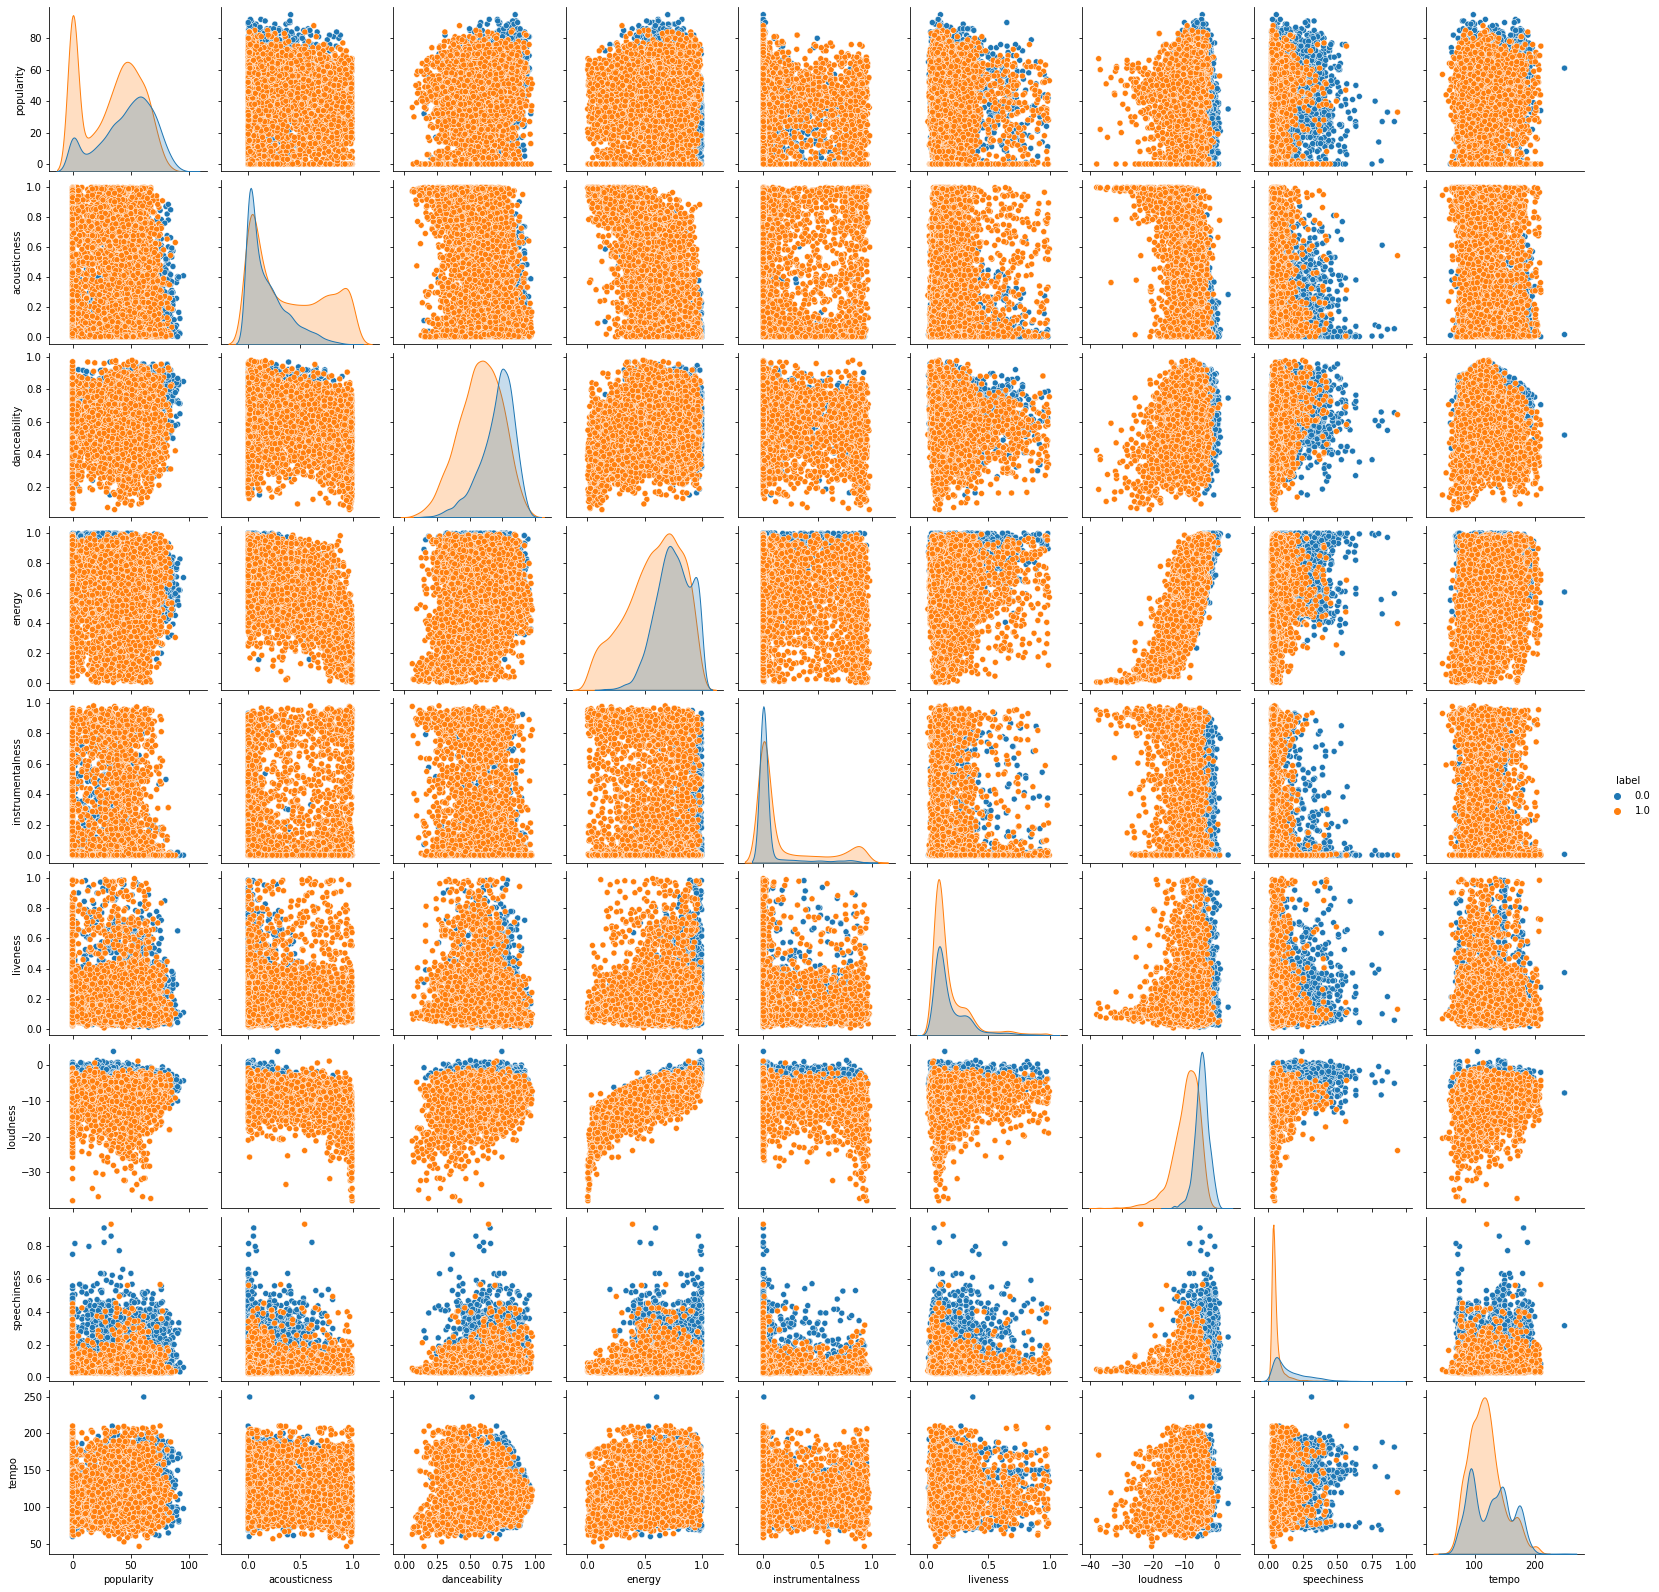

In [214]:
fig = plt.figure(figsize=(14, 14))
sns.pairplot(Dataset,hue="label")
plt.show()

**PCA**
=======

In [265]:
Dataset.drop('label', inplace=True, axis=1)
Dataset.shape

(8045, 9)

In [266]:
DS = StandardScaler().fit_transform(Dataset)
pca = decomposition.PCA(n_components=9).fit(DS)

print('Explained variance = {} {} {} {} {} {} {} {} '.format(*pca.explained_variance_ratio_))

Explained variance = 0.3119494312158736 0.14282884335526752 0.11485561747972464 0.10767557542251463 0.09923712453772407 0.08564151530346868 0.07078649746361176 0.04929057680188158 


In [267]:
100*pca.explained_variance_ratio_.cumsum()

array([ 31.19494312,  45.47782746,  56.96338921,  67.73094675,
        77.6546592 ,  86.21881073,  93.29746048,  98.22651816,
       100.        ])

In [270]:
Xproj = pca.transform(DS) 
Xreduced = Xproj[:,0:8] 
Xreduced.shape

(8045, 8)

In [271]:


print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

dfpca = pd.DataFrame(Xproj[:,0:8], columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5','PCA6',  'PCA7','PCA8'])
A= np.concatenate([labels0, labels1])
A.shape
dfpca['label']=A

Dimensionalidad datos en espacio PCA reducido = (8045, 8)


In [272]:
dfpca

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -1.576290 -0.066822 -1.378965  0.574072 -0.263558  0.098457  0.028221   
1    -1.559452 -0.227294 -0.433578  0.235918 -1.238493  0.246639 -0.449050   
2    -1.606221 -0.120215 -0.568365 -0.154746 -0.605753 -0.124363 -0.524969   
3    -2.246773 -1.792722  0.344835 -0.309140  0.311910  0.843183 -0.226896   
4    -1.623440 -0.114812  0.049710  2.341978  0.372048  1.299543  0.518396   
...        ...       ...       ...       ...       ...       ...       ...   
8040 -0.055201 -2.211570 -0.649504  0.265311  0.324225  0.147760 -0.764071   
8041 -0.006321 -0.006670 -0.564018 -0.368596 -1.395148 -0.562526  1.471166   
8042 -1.377572 -0.997746 -0.959911 -0.291456 -1.279201  0.245350  0.473570   
8043 -1.292035  0.662304 -1.079252 -0.948191  0.492043 -1.210560 -0.046390   
8044 -0.401464 -0.916551 -0.288454 -0.659086 -0.823388  0.853357 -0.416504   

          PCA8  label  
0     0.040571    0.0  
1     0.219151    0.0  
2     0.207586    0.0  
3     0.186590    0.0  
4     0.235777    0.0  
...        ...    ...  
8040 -0.634542    1.0  
8041  0.168658    1.0  
8042 -0.034534    1.0  
8043  0.263062    1.0  
8044  0.617752    1.0  

[8045 rows x 9 columns]

<Figure size 1008x1008 with 0 Axes>

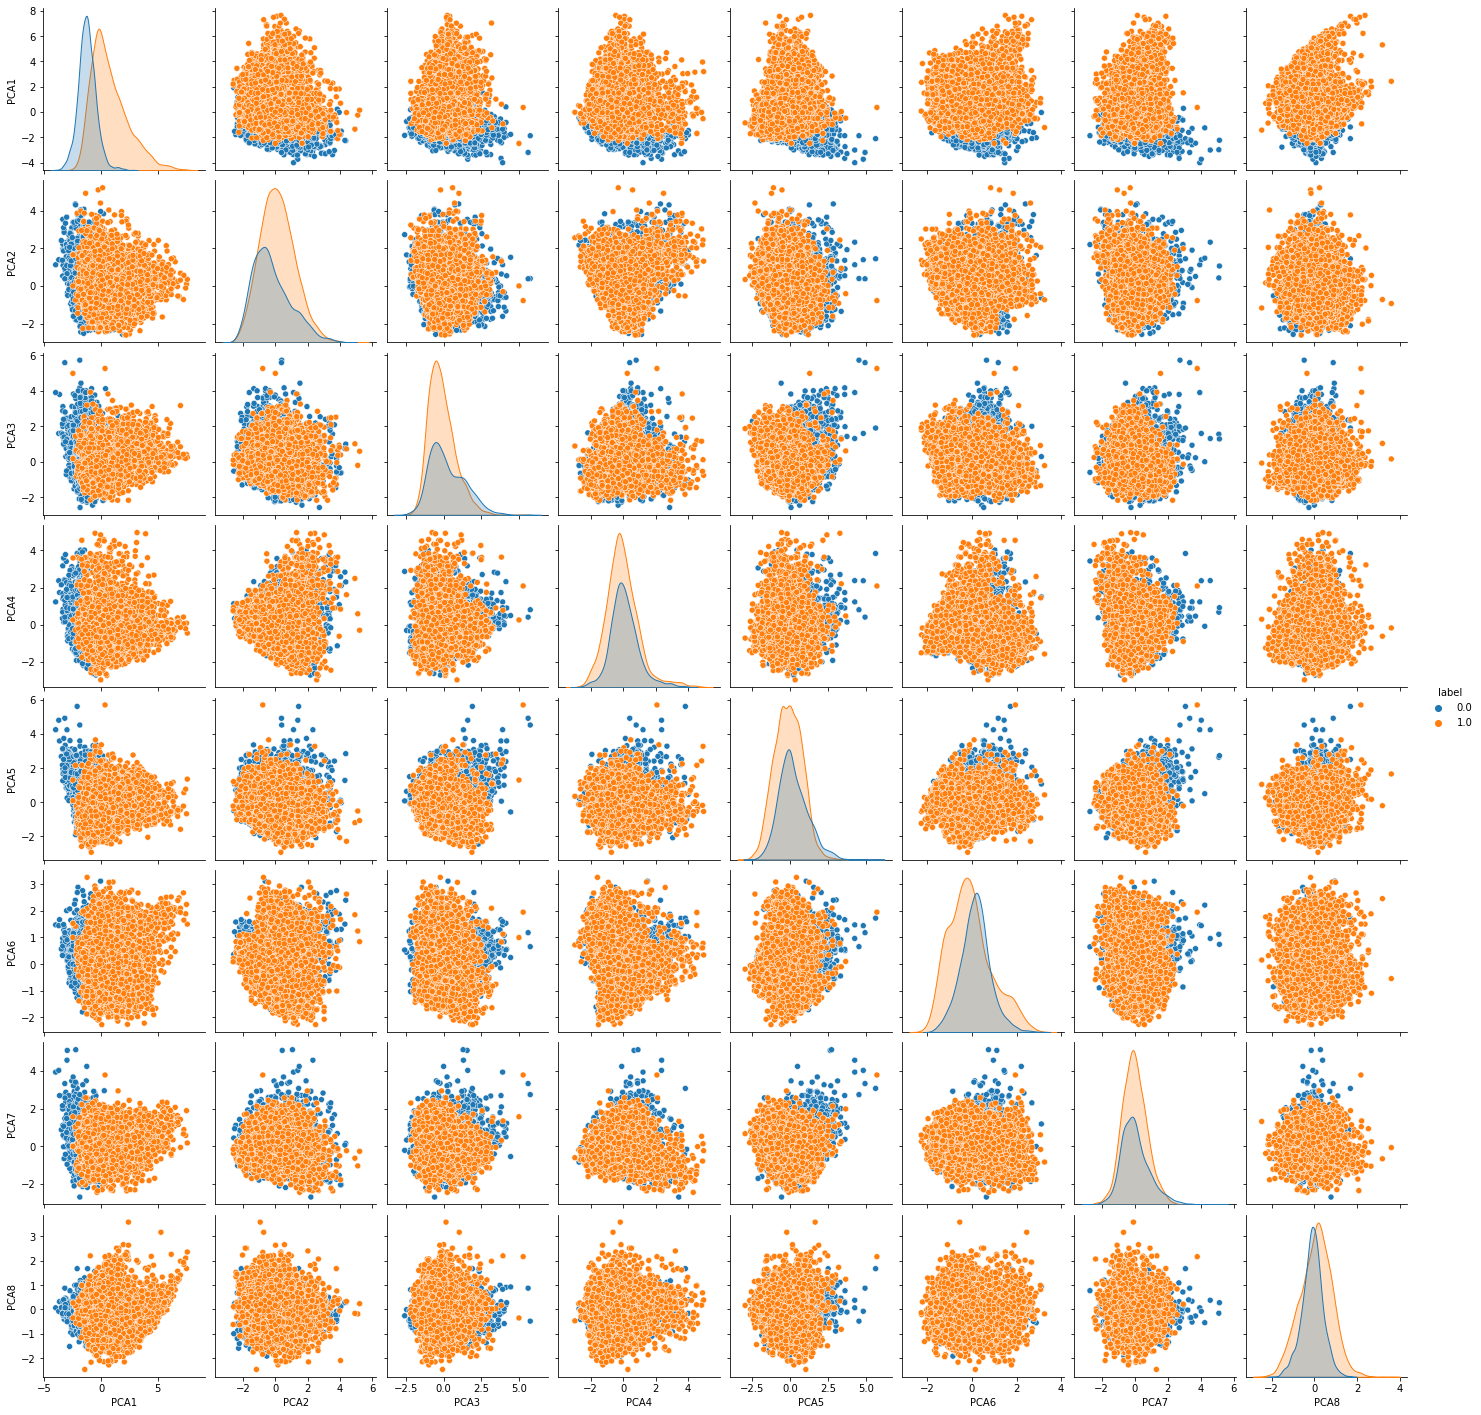

In [221]:
fig = plt.figure(figsize=(14, 14))
sns.pairplot(dfpca, hue='label')
plt.show()

In [274]:
# FITTING AND EVALUATING

# LOAD

X = Xreduced
y = A

# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)
Xtrain.shape

(5631, 8)

In [275]:
Xtest.shape

(2414, 8)

In [276]:
ytrain

array([0., 1., 1., ..., 0., 0., 0.])

In [277]:

# SELECT CLASSIFIER
model_knn  = KNeighborsClassifier(n_neighbors=3)
model_lda  = LinearDiscriminantAnalysis(n_components=None,priors=None, store_covariance=True)
model_qda  = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
model_tree = DecisionTreeClassifier()
model_gnb  = GaussianNB()



In [279]:

# FIT the model on one set of data
model_knn.fit(Xtrain, ytrain)
model_lda.fit(Xtrain, ytrain)
model_qda.fit(Xtrain, ytrain)
model_tree.fit(Xtrain, ytrain)
model_gnb.fit(Xtrain, ytrain)



GaussianNB()

In [280]:
# TEST evaluate the model on the second set of data
ytest_pred_knn  = model_knn.predict(Xtest)
ytest_pred_lda  = model_lda.predict(Xtest)
ytest_pred_qda  = model_qda.predict(Xtest)
ytest_pred_tree = model_tree.predict(Xtest)
ytest_pred_gnb  = model_gnb.predict(Xtest)



In [281]:
# Classification Report
print('KNN:')
print(classification_report(ytest, ytest_pred_knn))
print('LDA:')
print(classification_report(ytest, ytest_pred_lda))
print('QDA:')
print(classification_report(ytest, ytest_pred_qda))
print('TREE:')
print(classification_report(ytest, ytest_pred_tree))
print('GNB:')
print(classification_report(ytest, ytest_pred_gnb))




KNN:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       901
         1.0       0.89      0.91      0.90      1513

    accuracy                           0.87      2414
   macro avg       0.87      0.86      0.87      2414
weighted avg       0.87      0.87      0.87      2414

LDA:
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       901
         1.0       0.86      0.90      0.88      1513

    accuracy                           0.85      2414
   macro avg       0.84      0.83      0.83      2414
weighted avg       0.85      0.85      0.85      2414

QDA:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       901
         1.0       0.89      0.87      0.88      1513

    accuracy                           0.85      2414
   macro avg       0.84      0.85      0.84      2414
weighted avg       0.86      0.85      0.85      2414

TREE

In [283]:
# Cross Validarion Scores
scores_knn  = cross_val_score(model_knn, X, y, cv=5)
scores_lda  = cross_val_score(model_lda, X, y, cv=5)
scores_qda  = cross_val_score(model_qda, X, y, cv=5)
scores_tree = cross_val_score(model_tree, X, y, cv=5)
scores_gnb  = cross_val_score(model_gnb, X, y, cv=5)


# Cross Validation 
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (scores_lda.mean(), scores_lda.std() * 2))
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (scores_qda.mean(), scores_qda.std() * 2))
print("Accuracy TREE: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))




Accuracy KNN: 0.83 (+/- 0.05)
Accuracy LDA: 0.81 (+/- 0.11)
Accuracy QDA: 0.82 (+/- 0.14)
Accuracy TREE: 0.81 (+/- 0.05)
Accuracy GNB: 0.78 (+/- 0.17)


In [285]:
# Confusion Matrix Plot
cm1 = confusion_matrix(ytest_pred_knn, ytest)
cm2 = confusion_matrix(ytest_pred_lda, ytest)
cm3 = confusion_matrix(ytest_pred_qda, ytest)
cm4 = confusion_matrix(ytest_pred_tree, ytest)
cm5 = confusion_matrix(ytest_pred_gnb, ytest)


Text(0.5, 1.0, 'KNN')

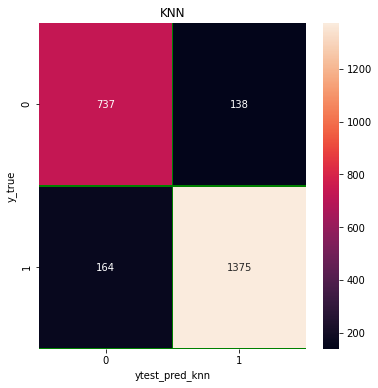

In [286]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_knn")
plt.ylabel("y_true")
plt.title('KNN')




Text(0.5, 1.0, 'LDA')

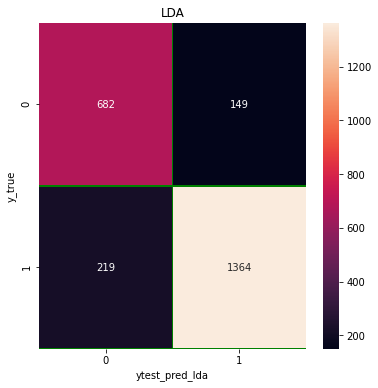

In [287]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_lda")
plt.ylabel("y_true")
plt.title('LDA')




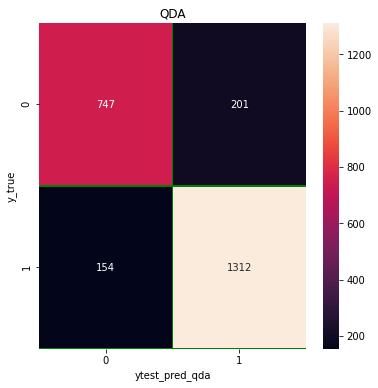

In [288]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_qda")
plt.ylabel("y_true")
plt.title('QDA')
plt.show()




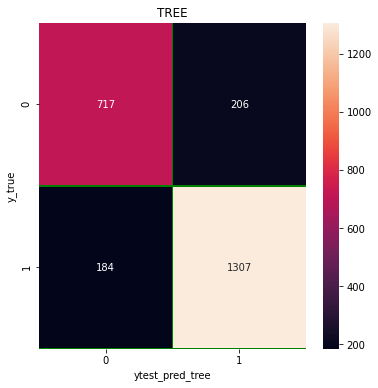

In [289]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm4,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('TREE')
plt.show()




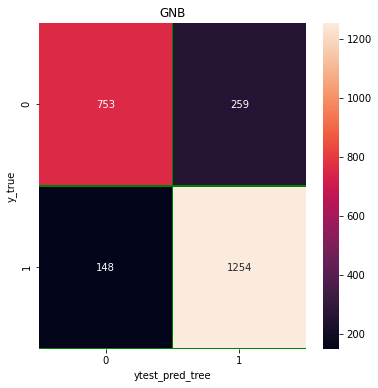

In [290]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm5,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('GNB')
plt.show()